In [1]:
import numpy as np
import pandas as pd

#Veri Görselleştirme
import matplotlib.pyplot as plt 
import seaborn as sns

# Algoritmalar
from sklearn.linear_model import LogisticRegression

#Train ve Test Setlerinin ayrılması
from sklearn.model_selection import train_test_split

#Değerlendirme Metrikleri
from sklearn.metrics import accuracy_score,classification_report

#Cross-validation ve en iyi parametrelerin seçimi
from sklearn.model_selection import GridSearchCV

#Kategorik Değişken Dönüşümü
from sklearn.preprocessing import LabelEncoder

# Gereksiz uyarıların görüntülenmemesi için kullanıyoruz
import warnings
warnings.filterwarnings('ignore')

# Birinci Veri Seti

In [54]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [55]:
# Hedef özelliğimiz kategorik bir veri. Ve 3 farklı değer içeriyor. Bu 3 farklı değerin olması 
#verimizin 3 farklı sınıfa dağılmış olduğu anlamına geliyor
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [58]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [59]:
# Tam dengeli bir veri seti 
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

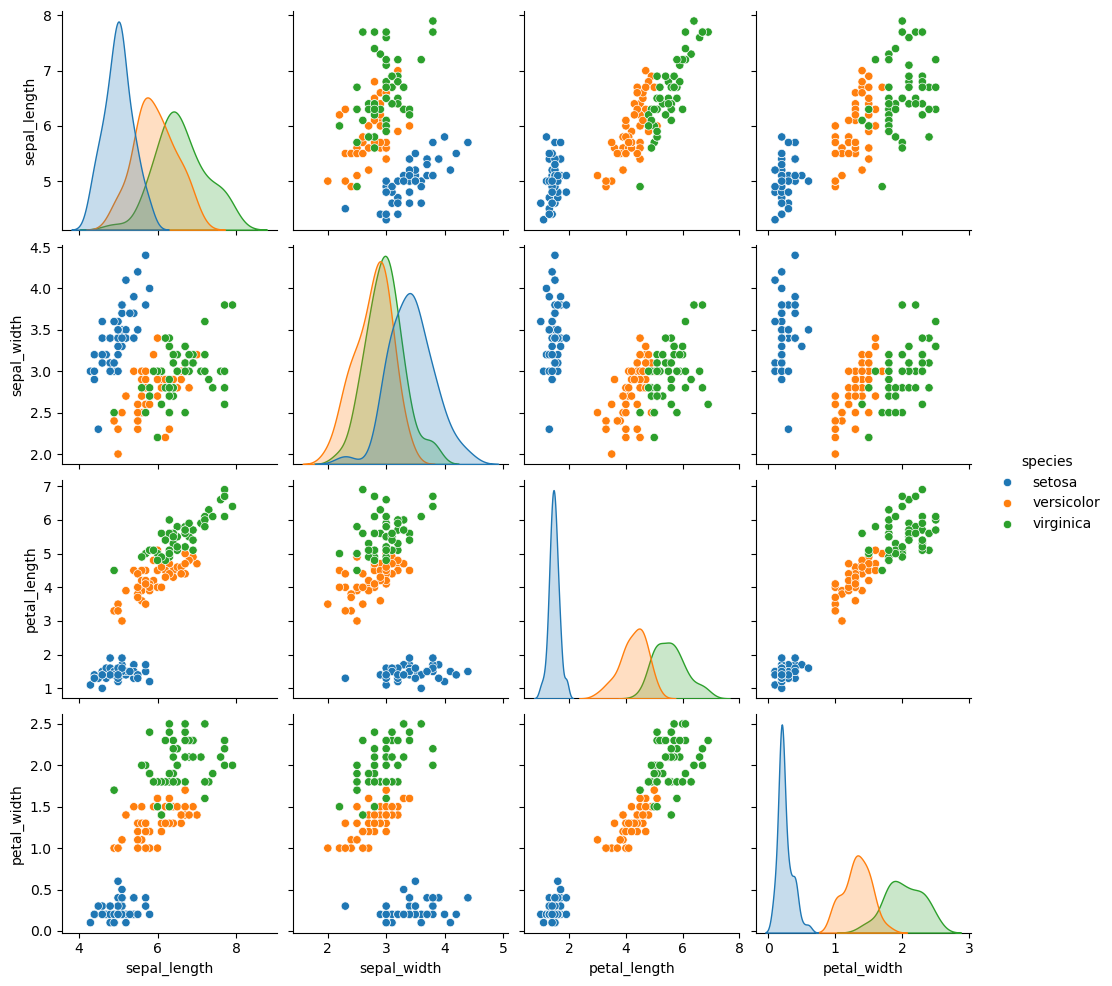

In [60]:
sns.pairplot(df,hue='species')

In [61]:
df['species'].map({'setosa':0,'versicolor':1,'virginica':2})
# df['species'] = df['species'].map({'setosa':0,'versicolor':1,'virginica':2})

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [62]:
le = LabelEncoder()
le.fit(df['species'])
df['species'] = le.transform(df['species'])

In [63]:
# Hedef özelliği label encoder ile de sayısal hale dönüştürebildiğimizi görüyoruz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [64]:
# Bağımlı ve bağımsız değişkenlerimizi/özelliklerimizi ayırıyoruz
X = df.drop(columns=['species'])
y= df['species']

In [65]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, random_state=42)

In [66]:
log_reg = LogisticRegression()
params = {'penalty':['l1','l2','elasticnet'],
          'C':[1,2,3,4,5,6,10,20,30,40,50],
          'max_iter':[100,200,300]}

In [67]:
# Çapraz doğrulama yöntemi ile en iyi parametrelerin seçimi
log_reg_cv = GridSearchCV(log_reg,param_grid=params,scoring='accuracy', cv=5, verbose=3)
log_reg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .......C=1, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .....C=1, max_iter=100, penalty=l2;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=1, max_iter=100, penalty=l2;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=1, max_iter=100, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END .....C=1, max_iter=100, penalty=l2;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=1, max_iter=100, penalty=l2;, score=0.958 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=elasti

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=3)

In [68]:
#En iyi parametrelerimiz bunlar
log_reg_cv.best_params_
LogisticRegression()

LogisticRegression()

In [69]:
#En iyi parametrelerimizle elde ettiğimiz skor
log_reg_cv.best_score_

0.9666666666666666

In [70]:
log_reg_cv.best_estimator_

LogisticRegression(C=1)

In [71]:
#Sonuçlar ne ifade ediyor?
y_pred = log_reg_cv.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [72]:
#Train seti ile doğruluk oranı kontrolü (Modelimiz Ezberliyor mu?)
y_pred_tr = log_reg_cv.predict(X_train)
print(classification_report(y_train,y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120



In [73]:
#Parametrelerde uçlarda verdiğimiz değerler seçildiği için bu yönlerde biraz daha küçük 
#veya büyük değerlerle denemek faydalı olabilir
LogisticRegression()
params2 = {'penalty':['l1','l2','elasticnet'],
          'C':[0.1,0.5,1,2,3,4,5,6,10,20,30,40,50],
          'max_iter':[20,50,100,200,300]}

In [74]:
log_reg_cv2 = GridSearchCV(log_reg,param_grid=params2,scoring='accuracy', cv=5, verbose=3)
log_reg_cv2.fit(X_train,y_train)

Fitting 5 folds for each of 195 candidates, totalling 975 fits
[CV 1/5] END ......C=0.1, max_iter=20, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ......C=0.1, max_iter=20, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ......C=0.1, max_iter=20, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ......C=0.1, max_iter=20, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ......C=0.1, max_iter=20, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.1, max_iter=20, penalty=l2;, score=0.875 total time=   0.0s
[CV 2/5] END ....C=0.1, max_iter=20, penalty=l2;, score=0.958 total time=   0.0s
[CV 3/5] END ....C=0.1, max_iter=20, penalty=l2;, score=0.875 total time=   0.0s
[CV 4/5] END ....C=0.1, max_iter=20, penalty=l2;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=0.1, max_iter=20, penalty=l2;, score=1.000 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=20, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=20, penalty=ela

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [20, 50, 100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=3)

In [75]:
#En iyi parametrelerimiz bunlar
log_reg_cv2.best_params_

{'C': 1, 'max_iter': 20, 'penalty': 'l2'}

In [76]:
#En iyi parametrelerimizle elde ettiğimiz sonuçlar bunlar
log_reg_cv2.best_score_

0.975

In [77]:
log_reg_cv2.best_estimator_

LogisticRegression(C=1, max_iter=20)

In [78]:
y_pred2 = log_reg_cv2.predict(X_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [79]:
#Train seti ile doğruluk oranı kontrolü (Modelimiz Ezberliyor mu?)
y_pred2_tr = log_reg_cv2.predict(X_train)
print(classification_report(y_train,y_pred2_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



# İkinci Veri Seti

In [ ]:
data:

In [12]:
df2 = pd.read_csv('./Data/breast-cancer-wisconsin.csv')
df2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df2.drop(columns=['Unnamed: 32','id'],inplace=True)

In [15]:
X = df2.drop(columns=['diagnosis'])
y = df2['diagnosis']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [31]:
log_reg2 = LogisticRegression()
log_reg_params = {'penalty':['l1','l2','elasticnet'],
          'C':[1,2,3,4,5,6,10,20,30],
          'max_iter':[50,100,200,300,400,500]}

In [32]:
log_reg_cv3 = GridSearchCV(log_reg2,param_grid=log_reg_params,scoring='accuracy',verbose=3)
log_reg_cv3.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END ........C=1, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ........C=1, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ........C=1, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ........C=1, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ........C=1, max_iter=50, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ......C=1, max_iter=50, penalty=l2;, score=0.978 total time=   0.0s
[CV 2/5] END ......C=1, max_iter=50, penalty=l2;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=1, max_iter=50, penalty=l2;, score=0.956 total time=   0.0s
[CV 4/5] END ......C=1, max_iter=50, penalty=l2;, score=0.901 total time=   0.0s
[CV 5/5] END ......C=1, max_iter=50, penalty=l2;, score=0.890 total time=   0.0s
[CV 1/5] END C=1, max_iter=50, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=50, penalty=elastic

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30],
                         'max_iter': [50, 100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=3)

In [33]:
#En iyi parametrelerimiz bunlar
log_reg_cv3.best_params_

{'C': 10, 'max_iter': 400, 'penalty': 'l2'}

In [34]:
#En iyi parametrelerimizle elde ettiğimiz sonuçlar bunlar
log_reg_cv3.best_score_

0.9626373626373625

In [35]:
log_reg_cv3.best_estimator_

LogisticRegression(C=10, max_iter=400)

In [36]:
y_pred3 = log_reg_cv3.predict(X_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [38]:
#Train seti ile doğruluk oranı kontrolü (Modelimiz Ezberliyor mu?)
y_pred3_tr = log_reg_cv3.predict(X_train)
print(classification_report(y_train,y_pred3_tr))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       286
           M       0.98      0.95      0.96       169

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455

